<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/N_body_simulation/N_body_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.tan(2*np.pi)

-2.4492935982947064e-16

In [51]:
A = [2,3,4]
b = A.copy()
b.remove(2)
A, b

([2, 3, 4], [3, 4])

## Testing Code

In [95]:
class Body:
    '''
    Initializing class. The attributes are:
        - mass (float): mass of the body, in kg
        - color (str): color from matplotlib.pyplot color scheme
        - size (int): matplotlib.pyplot size of represented body
        - vel (float): magnitude of initial velocity of the body
        - vel_direction (float): direction of initial velocity of body, in degrees
        - init_position (tuple): initial position of the body on the system. Tuple with x and y coordinates
        - acceleration: None, to be computed in code
        - next_position: None, to be computed in code

    '''
    def __init__(self, mass = 1, vel = 0, vel_direction = 0, init_position = (0,0), color = 'blue', size = 15):
        self.color              = color
        self.size               = size
        self.mass               = mass

        self.vel                = vel
        self.vel_direction      = np.deg2rad(vel_direction)   #converts direction to radians
        self.velocity           = self.decomposeVelocity()
        
        self.position           = init_position
        self.acceleration       = None
        self.next_position      = None     
        
    '''
    Function that decomposes velocity vector into vector components
    '''    
    def decomposeVelocity(self):
        if self.vel_direction != None:
            vx = self.vel * np.cos(self.vel_direction)        # compute x component of velocity vector
            vy = self.vel * np.sin(self.vel_direction)        # compute y component of velocoty vector
            return vx, vy                                  # return x and y components
          
    '''
    Function that computes the force between two bodies. It takes a second body as input,
    where the first body is self
    '''    
    def accBetweenTwoBodies(self, other):
        G = 6.67e-11                                             # gravitational constant
        m1, m2 = self.mass, other.mass                           # define masses of bodies 1 and 2
        x1, x2 = self.position[0], other.position[0]             # define x positions of bodies 1 and 2
        y1, y2 = self.position[1], other.position[1]             # define y positions of bodies 1 and 2
        
        r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)                   # compute distance between the two bodies
        
        if r == 0: acc = 0
        else: acc = (m2*G) / r**2                          # compute force acting on body 1
        
        dx = x2 - x1                                         # get relative distance between b1 and b2 on x axis
        dy = y2 - y1                                         # get relative distance between b1 and b2 on y axis
        direction = np.arctan2(dy, dx)                    # compute direction of vector of gravitational force of b2 on b1, where direction is in radians
        
        ax = acc * np.cos(direction)                             # decompose force into x component
        ay = acc * np.sin(direction)                            # decompose force into y component
        return ax, ay                                           # return force components
     
    

In [96]:
class System:
    def __init__(self, bodies, time_step):
        self.bodies             = bodies
        self.time_step          = time_step
        self.time               = 0
    
    def get_acceleration(self):
        for body in self.bodies:

            net_ax = sum([body.accBetweenTwoBodies(other_body)[0] for other_body in self.bodies])
            net_ay = sum([body.accBetweenTwoBodies(other_body)[1] for other_body in self.bodies])
        
            body.acceleration = net_ax, net_ay

    def updatePosition(self):
        for body in self.bodies:
            x, y   = body.position                           # set positions, velocities, and acceleration components to variables
            ax, ay = body.acceleration                              
            vx, vy = body.velocity
            t = self.time_step
            
            newX = x + vx*t + 1/2*ax*(t**2)                         # set new x and y positions based on kinematics formula
            newY = y + vy*t + 1/2*ay*(t**2)
            body.next_position = (newX, newY) 

    def updateVelocity(self):
        for body in self.bodies:
            vx, vy = body.velocity
            ax, ay = body.acceleration
            t = self.time_step
            
            newVx = vx + ax*t
            newVy = vy + ay*t
            
            body.velocity = newVx, newVy 
    
    def update(self):
        self.get_acceleration()
        self.updatePosition()
        self.updateVelocity()

        self.time += self.time_step
            
        for body in self.bodies:
            body.position = body.next_position

In [91]:
class Body:
    '''
    Initializing class. The attributes are:
        - mass (float): mass of the body, in kg
        - color (str): color from matplotlib.pyplot color scheme
        - size (int): matplotlib.pyplot size of represented body
        - vel (float): magnitude of initial velocity of the body
        - vel_direction (float): direction of initial velocity of body, in degrees
        - init_position (tuple): initial position of the body on the system. Tuple with x and y coordinates
        - acceleration: None, to be computed in code
        - next_position: None, to be computed in code

    '''
    def __init__(self, mass = 1, vel = 0, vel_direction = 0, init_position = (0,0), color = 'blue', size = 15):
        self.color              = color
        self.size               = size
        self.mass               = mass

        self.vel                = vel
        self.vel_direction      = np.deg2rad(vel_direction)   #converts direction to radians
        self.velocity           = self.decomposeVelocity()
        
        self.position           = init_position
        self.acceleration       = None
        self.next_position      = None     
        
    '''
    Function that decomposes velocity vector into vector components
    '''    
    def decomposeVelocity(self):
        if self.vel_direction != None:
            vx = self.vel * np.cos(self.vel_direction)        # compute x component of velocity vector
            vy = self.vel * np.sin(self.vel_direction)        # compute y component of velocoty vector
            return vx, vy                                  # return x and y components
          
    '''
    Function that computes the force between two bodies. It takes a second body as input,
    where the first body is self
    '''    
    def forceBetweenTwoBodies(self, other):
        G = 6.67e-11                                             # gravitational constant
        m1, m2 = self.mass, other.mass                           # define masses of bodies 1 and 2
        x1, x2 = self.position[0], other.position[0]             # define x positions of bodies 1 and 2
        y1, y2 = self.position[1], other.position[1]             # define y positions of bodies 1 and 2
        
        r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)                   # compute distance between the two bodies
        
        if r == 0: force = 0
        else: force = (m1*m2*G) / r**2                          # compute force acting on body 1
        
        rel_x = x2 - x1                                         # get relative distance between b1 and b2 on x axis
        rel_y = y2 - y1                                         # get relative distance between b1 and b2 on y axis
        direction = np.arctan2(rel_y, rel_x)                    # compute direction of vector of gravitational force of b2 on b1, where direction is in radians
        
        fx = force * np.cos(direction)                             # decompose force into x component
        fy = force * np.sin(direction)                             # decompose force into y component
        return fx, fy                                           # return force components
     
    '''
    This function computes the net force acting on a body from all the forces on the system.
    It takes as input the system of bodies, which is a list that holds Body objects
    '''
    def forceOnBody(self, system):
        netFx = sum([self.forceBetweenTwoBodies(body)[0] for body in system])
        netFy = sum([self.forceBetweenTwoBodies(body)[1] for body in system])
        return netFx, netFy                                     # return the net forces
    
    '''
    This function computes the acceleration that a body suffers, decomposed in each axis
    '''
    def getAcceleration(self, system):
        netFx, netFy = self.forceOnBody(system)                 # set variables of net force on x and y axis as output of force computation function
        ax, ay = netFx / self.mass, netFy / self.mass           # use F=ma to get acceleration on each axis
        self.acceleration = ax, ay                              # update acceleration attribute

    '''
    This function updates the position of a body using the acceleration, 
    current velocity, and time variables
    '''    
    def updatePosition(self, t, system):
        self.getAcceleration(system)                            # get acceleration of a body by calling the get_acceleration function
        x, y   = self.position                           # set positions, velocities, and acceleration components to variables
        ax, ay = self.acceleration                              
        vx, vy = self.velocity
        
        newX = x + vx*t + 1/2*ax*(t**2)                         # set new x and y positions based on kinematics formula
        newY = y + vy*t + 1/2*ay*(t**2)
        self.next_position = (newX, newY)                       # set next_position according to new positions obtained

    def updateVelocity(self, t):
        vx, vy = self.velocity
        ax, ay = self.acceleration
        
        newVx = vx + ax*t
        newVy = vy + ay*t
        
        self.velocity = newVx, newVy

class System:
    def __init__(self, bodies, time_step):
        self.bodies             = bodies
        self.time_step          = time_step
    
    def update(self):
        for body in self.bodies:
            body.updatePosition(self.time_step, self.bodies)
            body.updateVelocity(self.time_step)
            
        for body in self.bodies:
            body.position = body.next_position

## N-Body Code

In [78]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67 * 10**(-11)
AU = 1.49 * 10**11

scale = 3e9
G = 6.67e-11 

class Body:

    def __init__(self, init_position, vel, vel_direction, mass = 1e10, color = 'red', size = 2):
        self.position = init_position
        self.v_mag = vel
        self.v_dir = vel_direction
        self.mass = mass
        self.color = color
        self.size = size

        self.vx = vel * np.cos(np.deg2rad(vel_direction))
        self.vy = vel * np.sin(np.deg2rad(vel_direction))

        self.ax = 0 # acceleration in x direction
        self.ay = 0 # acceleration in y direction

        self.next_position = None

    def get_distance(self, other_body):
        '''
        Return the magnitude and direction of the distance between
        this body and given other body
        '''
        dx = other_body.position[0] - self.position[0]
        dy = other_body.position[1] - self.position[1]

        #dist_mag = np.sqrt(dx**2 + dy**2)
        #dist_dir = np.arctan(dy/dx)

        return dx, dy

    def get_acceleration(self, other_body):

        dx, dy = self.get_distance(other_body)
        dist = np.sqrt(dx**2 + dy**2)

        a_mag = G * other_body.mass / (dist**2)

        direction = np.arctan2(dy, dx)

        ax = a_mag * np.cos(direction)
        ay = a_mag * np.sin(direction)

        return ax, ay

class System:
    
    def __init__(self, bodies, time_step = 10**3, scale = 3e9):
        self.bodies = bodies
        self.time_step = time_step
        self.scale = scale
        self.time = 0

    def update_acceleration(self):
        for body in self.bodies:
            body.ax = 0
            body.ay = 0

            for other_body in self.bodies:
                if body != other_body:
                    ax, ay = body.get_acceleration(other_body)

                    body.ax += ax
                    body.ay += ay

    def update_position(self):
        for body in self.bodies:
            x, y = body.position

            x_next = x + body.vx * self.time_step + 0.5 * body.ax * self.time_step**2
            y_next = x + body.vy * self.time_step + 0.5 * body.ay * self.time_step**2

            body.next_position = (x_next,y_next)

    def update_velocity(self):
        for body in self.bodies:
            body.vx += (body.ax * self.time_step) 
            body.vy += (body.ax * self.time_step)


    def update(self):
        """
        find the next position using forward Euler's method 
        """
        self.update_acceleration()
        self.update_position()
        self.update_velocity()

        self.time += self.time_step

        for body in self.bodies:
            body.position = body.next_position

    def display(self):
        for i in range(len(self.bodies)):
            plt.plot(self.bodies[i].position[0], self.bodies[i].position[1], 
                     marker = 'o', color = self.bodies[i].color, ms = self.bodies[i].size) 
            
            plt.xlim(-3*self.scale, 3*self.scale)
            plt.ylim(-3*self.scale, 3*self.scale)

            plt.xlabel('x direction')
            plt.ylabel('y direction')

        plt.title("System time = "+str(self.time))
        plt.show()


In [37]:
np.sin(np.deg2rad(90))

1.0

In [97]:
scale = 3e9
G = 6.67e-11 
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size=15)
b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size=15)

bodies = [b1, b2]

t_step = 1e3
system = System(bodies, time_step=t_step)

#system.display()

for i in range(1):
    system.update()
#    system.display()
#    ax = [body.ax for body in system.bodies]
#    ay = [body.ay for body in system.bodies]
#    plt.plot(ax, ay, ".", label = str(i))

#    plt.legend()
#    plt.show()

In [98]:
[body.next_position for body in system.bodies]

[(2999999817.043554, 1047730.250439468),
 (-299999981.70435536, -104773.02504394678)]

Progress:  50


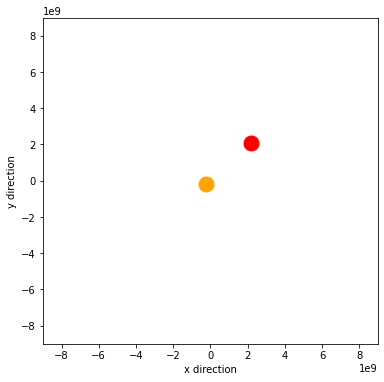

In [99]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
#system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 100)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

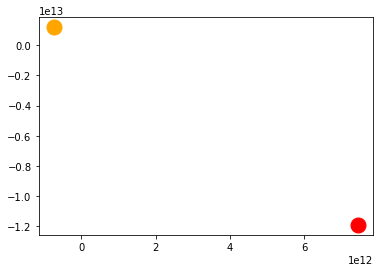

In [32]:
for i in range(len(system.bodies)):
    plt.plot(system.bodies[i].position[0], system.bodies[i].position[1], 
             marker = 'o', color = system.bodies[i].color, ms = system.bodies[i].size) 
        
plt.show()

In [ ]:
plt.plot(system.bodies[0].position[0], system.bodies[0].position[1])

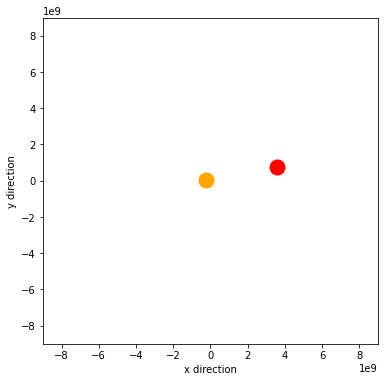

In [ ]:
system.display()


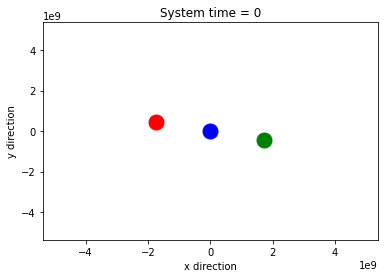

In [55]:
scale = 1.79e9
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = 42.843398292913164

b1 = Body(init_position = pos, mass = m1, vel = v, vel_direction = v_d, color = 'r', size = 15)
b2 = Body(init_position = -pos, mass = m1, vel = v, vel_direction = v_d, color = 'g', size = 15)
b3 = Body(init_position = (0,0), mass = m1, vel = 2*v, vel_direction = v_d-180, color = 'b', size = 15)

bodies = [b1, b2, b3]


t_step = 1e-3
system = System(bodies, time_step=t_step, scale = scale)

system.display()

#for i in range(1000000):
#    system.update()
#    if i%100000 == 0:
#        system.display()
        

Progress:  350


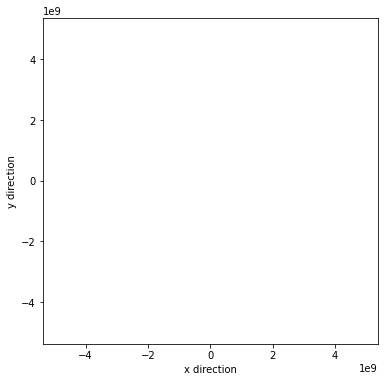

In [56]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 400)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

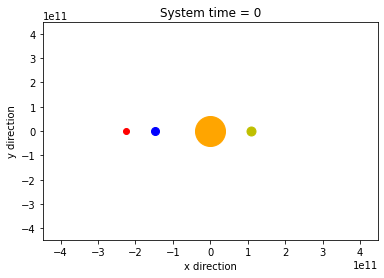

In [51]:
scale = 1.49e11

Sun     = Body(init_position = (0,0), 
               vel = 0, 
               vel_direction = 0)

Earth   = Body(init_position = (-1*scale,0),
                vel = 29.783*1000,
                vel_direction = 90)

Venus   = Body(init_position = (0.723*scale, 0),
                vel = 35.02*1000,
                vel_direction = 270)

Mars    = Body(init_position = (-1.52*scale, 0),
                vel = 24*1000,
                vel_direction = 90)


Sun.mass    = 1.98892e30
Sun.color   = 'orange'
Sun.size    = 30
    
Earth.mass  = 5.9742 * 10 ** 24
Earth.color = 'b'
Earth.size  = 8
    
Venus.mass  = 4.8685 * 10 ** 24
Venus.color = 'y'
Venus.size  = 9
   
Mars.mass   = 6.39 * 10 ** 23
Mars.color  = 'r'
Mars.size   = 6


bodies = [Sun, Earth, Venus, Mars]

t_step = 1e3
system = System(bodies, time_step=t_step, scale = scale)

system.display()

#for i in range(1000):
#    system.update()
#    if i%100 == 0:
#        system.display()

Progress:  150


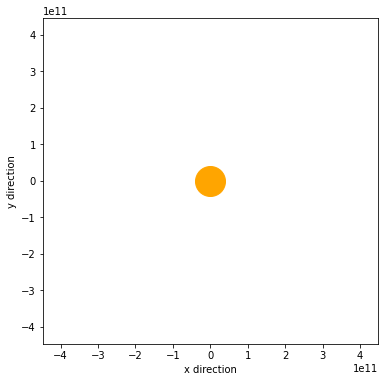

In [53]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)
system.display()


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 50, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")

HTML(ani.to_html5_video())

#ani.save("OrbitSimulation.gif")
#print("Done")

#plt.show()

In [24]:
[(body.position,body.v_x, body.v_y, body.a_x, body.a_y)  for body in system.bodies]

[((1021691977.7776864, 3187006285.694127),
  35013.64307264846,
  34997.79311162424,
  0.24341313127745262,
  -0.19401296037097593),
 ((-904541170.5943965, -3076911404.993752),
  -34978.340080810325,
  -34994.19004183455,
  -0.25766549785750437,
  0.18482308239488143),
 ((-117150807.18329407, -110094880.7003746),
  -35.30299183810945,
  -3.6030697896665913,
  0.014252366580052118,
  0.009189877976094508)]

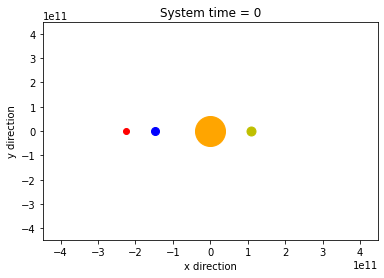

In [ ]:
t_step = 1e2
system = System(bodies, time_step=t_step, scale = scale)
system.display()

In [ ]:
bodies

AttributeError: ignored